In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('euromillions_Fusion.csv',sep=';', encoding='ISO-8859-1')

In [23]:
df.head()

,annee_numero_de_tirage,jour_de_tirage,date_de_tirage,numï¿½ro_de_tirage_dans_le_cycle,date_de_forclusion,boule_1,boule_2,boule_3,boule_4,boule_5,...,rapport_du_rang7_Etoile+,nombre_de_gagnant_au_rang8_Etoile+,rapport_du_rang8_Etoile+,nombre_de_gagnant_au_rang9_Etoile+,rapport_du_rang9_Etoile+,nombre_de_gagnant_au_rang10_Etoile+,rapport_du_rang10_Etoile+,numero_My_Million,numero_Tirage_Exceptionnel_Euro_Million,Unnamed: 75
0,20244006,VENDREDI,19/01/2024,1,20/03/2024,50,27,28,48,44,...,4,18046,"11,1",42691,"2,6",424081,"2,3",QE 911 6397,NaN,NaN
1,20244005,MARDI,16/01/2024,7,17/03/2024,18,21,33,45,10,...,"4,4",13958,"12,7",39974,"2,5",328733,"2,7",CU 208 5890,NaN,NaN
2,20244004,VENDREDI,12/01/2024,6,13/03/2024,18,16,17,49,45,...,"4,3",18344,"12,4",46653,"2,7",427062,"2,6",RT 208 4085,NaN,NaN
3,20244003,MARDI,09/01/2024,5,10/03/2024,12,9,2,39,40,...,"3,8",15703,"10,8",41373,"2,3",339112,"2,4",LN 958 0675,NaN,NaN
4,20244002,VENDREDI,05/01/2024,4,06/03/2024,18,4,39,7,50,...,"3,1",26334,"8,5",54128,"2,3",474691,"2,3",SA 454 2143,NaN,NaN


In [24]:
column_names = df.columns
column_names

Index(['annee_numero_de_tirage', 'jour_de_tirage', 'date_de_tirage',
       'numï¿½ro_de_tirage_dans_le_cycle', 'date_de_forclusion', 'boule_1',
       'boule_2', 'boule_3', 'boule_4', 'boule_5', 'etoile_1', 'etoile_2',
       'boules_gagnantes_en_ordre_croissant',
       'etoiles_gagnantes_en_ordre_croissant',
       'nombre_de_gagnant_au_rang1_Euro_Millions_en_france',
       'nombre_de_gagnant_au_rang1_Euro_Millions_en_europe',
       'rapport_du_rang1_Euro_Millions',
       'nombre_de_gagnant_au_rang2_Euro_Millions_en_france',
       'nombre_de_gagnant_au_rang2_Euro_Millions_en_europe',
       'rapport_du_rang2_Euro_Millions',
       'nombre_de_gagnant_au_rang3_Euro_Millions_en_france',
       'nombre_de_gagnant_au_rang3_Euro_Millions_en_europe',
       'rapport_du_rang3_Euro_Millions',
       'nombre_de_gagnant_au_rang4_Euro_Millions_en_france',
       'nombre_de_gagnant_au_rang4_Euro_Millions_en_europe',
       'rapport_du_rang4_Euro_Millions',
       'nombre_de_gagnant_au_rang5_

In [25]:
df_ligth = df[['boule_1','boule_2','boule_3','boule_4','boule_5','etoile_1','etoile_2']]

In [26]:
test = df[['boules_gagnantes_en_ordre_croissant','etoiles_gagnantes_en_ordre_croissant']]

In [27]:
test.head(2)

,boules_gagnantes_en_ordre_croissant,etoiles_gagnantes_en_ordre_croissant
0,-27-28-44-48-50-,-7-12-
1,-10-18-21-33-45-,-8-12-


In [28]:
df_ligth.head()

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
0,50,27,28,48,44,7,12
1,18,21,33,45,10,12,8
2,18,16,17,49,45,9,12
3,12,9,2,39,40,3,1
4,18,4,39,7,50,8,3


In [29]:
for column in df_ligth.columns:
    counts = df_ligth[column].value_counts()
#    print(f"\nDistribution of {column}:\n{counts}")

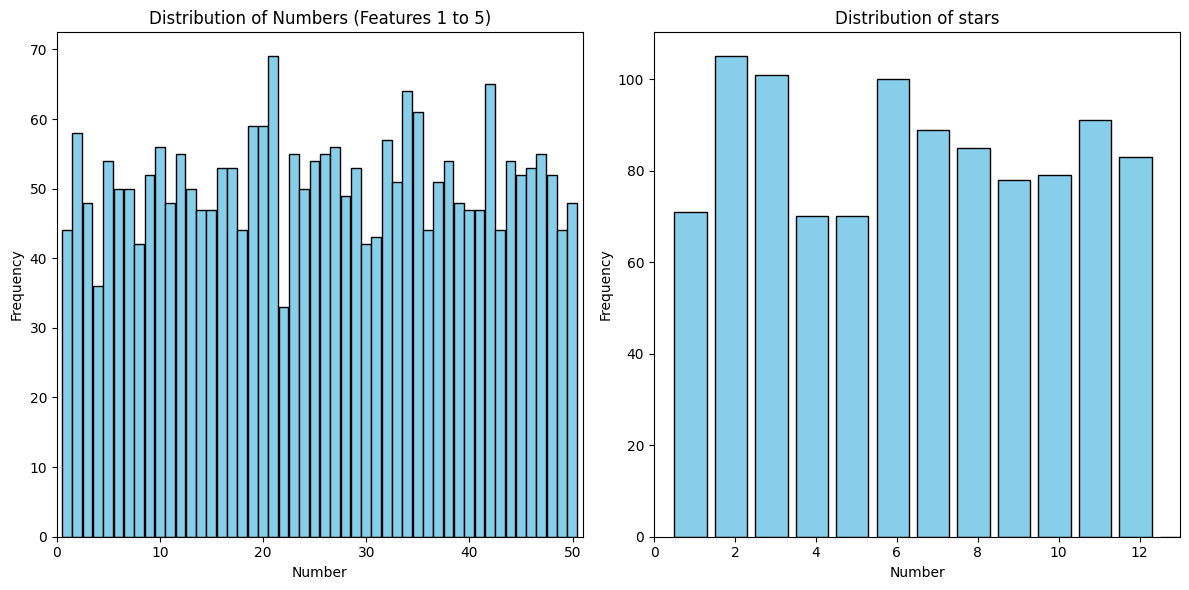

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

bin_edges = [edge - 0.5 for edge in range(df_ligth.min().min(), df_ligth.max().max() + 2)]
# Histogram for features 1 to 5
axes[0].hist(df_ligth.iloc[:, :5].values.flatten(), bins=bin_edges, color='skyblue', edgecolor='black', width=0.95)
axes[0].set_title('Distribution of Numbers (Features 1 to 5)')
axes[0].set_xlabel('Number')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim([0, 51])

# Histogram for features 6 and 7
hist_2 = axes[1].hist(df_ligth.iloc[:, 5:].values.flatten(), bins=bin_edges, color='skyblue', edgecolor='black', width=0.8)
axes[1].set_title('Distribution of stars')
axes[1].set_xlabel('Number')
axes[1].set_ylabel('Frequency')

# Customize x-axis labels for the second subplot
# axes[1].set_xticks(hist_2[1])
# axes[1].set_xticklabels(hist_2[1])
axes[1].set_xlim([0, 13])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [31]:
# Select features 1 to 5
features_1_to_5 = df_ligth.iloc[:, :5]
# Check if at least one value in each row is less than 10
at_least_one_less_than_10 = (features_1_to_5 < 10).any(axis=1)

# Count the number of rows where at least one value is less than 10
count_rows_at_least_one_less_than_10 = at_least_one_less_than_10.sum()/df_ligth.shape[0]*100

print(f'% of times a value < 10 appears numbers: {count_rows_at_least_one_less_than_10:.2f}%')

% of times a value < 10 appears numbers: 62.04%


In [32]:
# Check if at least one value in each row is less than 20
at_least_one_less_than_20 = ((features_1_to_5 >= 10) & (features_1_to_5 < 20)).any(axis=1)

# Count the number of rows where at least one value is less than 20
count_rows_at_least_one_less_than_20 = at_least_one_less_than_20.sum()/df_ligth.shape[0]*100

print(f'% of times a value < 20 appears numbers: {count_rows_at_least_one_less_than_20:.2f}%')

% of times a value < 20 appears numbers: 69.67%


In [33]:
# Check if at least one value in each row is less than 30
at_least_one_less_than_30 = ((features_1_to_5 >= 20) & (features_1_to_5 < 30)).any(axis=1)

# Count the number of rows where at least one value is less than 30
count_rows_at_least_one_less_than_30 = at_least_one_less_than_30.sum()/df_ligth.shape[0]*100

print(f'% of times a value < 30 appears numbers: {count_rows_at_least_one_less_than_30:.2f}%')

% of times a value < 30 appears numbers: 71.04%


In [34]:
# Check if at least one value in each row is less than 40
at_least_one_less_than_40 = ((features_1_to_5 >= 30) & (features_1_to_5 < 40)).any(axis=1)

# Count the number of rows where at least one value is less than 40
count_rows_at_least_one_less_than_40 = at_least_one_less_than_40.sum()/df_ligth.shape[0]*100

print(f'% of times a value < 40 appears numbers: {count_rows_at_least_one_less_than_40:.2f}%')

% of times a value < 40 appears numbers: 70.25%


In [35]:
# Check if at least one value in each row is less than 50
at_least_one_less_than_50 = ((features_1_to_5 >= 40) & (features_1_to_5 <= 50)).any(axis=1)

# Count the number of rows where at least one value is less than 50
count_rows_at_least_one_less_than_40 = at_least_one_less_than_50.sum()/df_ligth.shape[0]*100

print(f'% of times a value <= 50 appears numbers: {count_rows_at_least_one_less_than_40:.2f}%')

% of times a value <= 50 appears numbers: 73.58%


In [36]:
# Check if at least one value in each row is less than 50
at_least_one_less_than_25 = ((features_1_to_5 <= 25)).any(axis=1)

# Count the number of rows where at least one value is less than 50
count_rows_at_least_one_less_than_25 = at_least_one_less_than_25.sum()/df_ligth.shape[0]*100

print(f'% of times a value <= 25 appears numbers: {count_rows_at_least_one_less_than_25:.2f}%')

% of times a value <= 25 appears numbers: 98.04%


In [37]:
Number50 = (features_1_to_5 == 50).any(axis=1)
Number50 = Number50.sum()/df_ligth.shape[0]*100
print(f'% 50: {Number50:.2f}%')

% 50: 9.39%


In [38]:
Number1 = (features_1_to_5 == 1).any(axis=1)
Number1 = Number1.sum()/df_ligth.shape[0]*100
print(f'% 1: {Number1:.2f}%')

% 1: 8.61%


In [39]:
# Count the number of values less than 24 for each row in features 1 to 5
count_less_than_25_per_row = (features_1_to_5 <= 25).sum(axis=1)

# Print the count for each row
print('Number of values less than 25 for each row:')
print(count_less_than_25_per_row)


Number of values less than 25 for each row:
0      0
1      3
2      3
3      3
4      3
      ..
506    3
507    4
508    4
509    3
510    3
Length: 511, dtype: int64


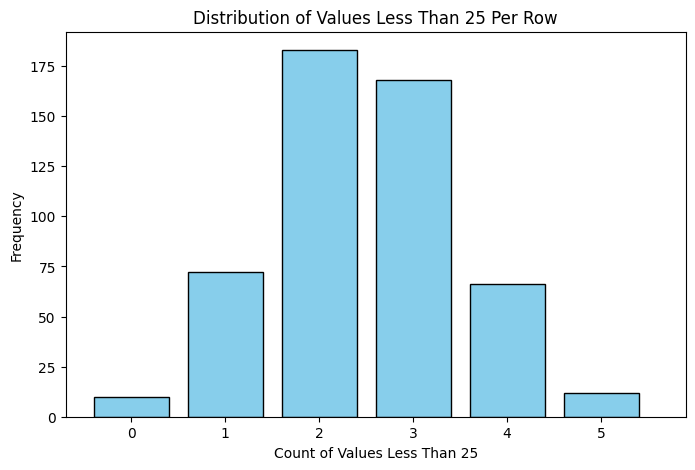

In [40]:
# Plot histogram
plt.figure(figsize=(8, 5))
bin_edges = [edge - 0.4 for edge in range(count_less_than_25_per_row.min(), count_less_than_25_per_row.max() + 2)]
plt.hist(count_less_than_25_per_row, bins=bin_edges, color='skyblue', edgecolor='black', width=0.8)
plt.title('Distribution of Values Less Than 25 Per Row')
plt.xlabel('Count of Values Less Than 25')
plt.ylabel('Frequency')
plt.xticks(range(6))
plt.show()

## Create Data with a windows

In [41]:
# frequency of a number in the last window rows
def count_frequency(dataframe, windows):
    df_ = dataframe.copy()
    for col in ['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']:
        df_[f'freq_{col}'] = df_.apply(lambda row: sum(df_[['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']].iloc[max(0, row.name - windows):row.name].values.flatten() == row[col]), axis=1)
    for col in ['etoile_1', 'etoile_2']:
        df_[f'freq_{col}'] = df_.apply(lambda row: sum(df_[['etoile_1', 'etoile_2']].iloc[max(0, row.name - windows):row.name].values.flatten() == row[col]), axis=1)
    return df_

In [42]:
df_ligth.tail(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
509,16,10,46,39,6,8,11
510,9,19,26,31,6,12,11


In [43]:
df_ligth.head(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
0,50,27,28,48,44,7,12
1,18,21,33,45,10,12,8


In [44]:
df_ligth = df_ligth[::-1].reset_index(drop=True)

In [45]:
df_ligth.tail(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
509,18,21,33,45,10,12,8
510,50,27,28,48,44,7,12


In [46]:
df_ligth.head(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
0,9,19,26,31,6,12,11
1,16,10,46,39,6,8,11


In [56]:
df_extend = count_frequency(df_ligth, windows = 12)

In [57]:
df_extend.shape

(511, 14)

In [58]:
df_extend.head(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2,freq_boule_1,freq_boule_2,freq_boule_3,freq_boule_4,freq_boule_5,freq_etoile_1,freq_etoile_2
0,9,19,26,31,6,12,11,0,0,0,0,0,0,0
1,16,10,46,39,6,8,11,0,0,0,0,1,0,1


In [59]:
def quadra_dif(data):
  df_ = data.copy()
  columns_to_diff = ['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']
  for i in range(0, df_.shape[0]):
    df_['sum_diff_r2'] = ((df_[columns_to_diff].diff(axis=1) ** 2).sum(axis=1)).astype(int)
  return df_

In [60]:
df_extend = quadra_dif(df_extend)

In [61]:
df_extend.head(3)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2,freq_boule_1,freq_boule_2,freq_boule_3,freq_boule_4,freq_boule_5,freq_etoile_1,freq_etoile_2,sum_diff_r2
0,9,19,26,31,6,12,11,0,0,0,0,0,0,0,799
1,16,10,46,39,6,8,11,0,0,0,0,1,0,1,2470
2,40,17,24,19,18,8,4,0,0,0,1,0,1,0,604


In [62]:
# How long the number didn't not appear
def no_star(data):
  df_ = data.copy()
  for num in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
    mask = ((df_['etoile_1'] == num) | (df_['etoile_2'] == num))
    df_[f'no_{num}'] = (~mask).groupby((mask).cumsum()).cumsum()
    # df_[f'no_{num}'] = df_[f'no_{num}'].shift(fill_value=0).astype(int)
  return df_

In [63]:
df_extend = no_star(df_extend)

In [65]:
df_extend.head(5)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2,freq_boule_1,freq_boule_2,freq_boule_3,...,no_3,no_4,no_5,no_6,no_7,no_8,no_9,no_10,no_11,no_12
0,9,19,26,31,6,12,11,0,0,0,...,1,1,1,1,1,1,1,1,0,0
1,16,10,46,39,6,8,11,0,0,0,...,2,2,2,2,2,0,2,2,0,1
2,40,17,24,19,18,8,4,0,0,0,...,3,0,3,3,3,0,3,3,1,2
3,5,13,7,19,31,9,2,0,0,0,...,4,1,4,4,4,1,0,4,2,3
4,46,24,42,15,3,12,9,1,1,0,...,5,2,5,5,5,2,0,5,3,0


In [66]:
# Function to create sequences for X and y
def create_sequences(data, length):
    X,Y = [],[]
    for i in range(len(data)-length):
        X.append(data.iloc[i:i+length, 0:data.shape[1]].values)
        Y.append(data.iloc[i+length, 0:7])

    return np.array(X),np.array(Y)

# Define the sequence length
rows_windows = 12

# Create sequences for X and y
X, y = create_sequences(df_extend, rows_windows)

# Print the shapes of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (499, 12, 27)
y shape: (499, 7)


In [67]:
print(X[-1])

[[  48   30   50   42   17    4    8    2    2    4    1    0    1    2
  1413    4    5    5    0    1   13    3    0    1    9   24    2]
 [  43   39   28   37    6    9   12    0    3    0    0    1    3    2
  1179    5    6    6    1    2   14    4    1    0   10   25    0]
 [   2   13   37   38   48    9    5    1    1    1    2    2    4    3
   798    6    7    7    2    0   15    5    2    0   11   26    1]
 [  20   43   41   45   10   12    2    2    1    0    0    3    3    3
  1774    7    0    8    3    1   16    6    3    1   12   27    0]
 [  14   49   34   44    6   12    4    1    0    1    2    2    4    1
  2994    8    1    9    0    2   17    7    4    2   13   28    0]
 [  47   27    8   30   35    9   10    1    1    0    1    0    4    0
  1270    9    2   10    1    3   18    8    5    0    0   29    1]
 [   2   36   19   37    3    9    6    2    0    1    2    0    5    0
  2925   10    3   11    2    4    0    9    6    0    1   30    2]
 [   7   18   49   4

In [68]:
print(y[-1])

[50 27 28 48 44  7 12]


In [69]:
# Scaled data because StandardScaler expected <= 2 dim
from sklearn.model_selection import train_test_split

X_scaled = (X - np.mean(X, axis=0))/np.std(X, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, shuffle=False)

In [70]:
print('X_train:', X_train.shape, 'X_test:', X_test.shape)
print('y_train:', y_train.shape, 'y_test:', y_test.shape)

X_train: (474, 12, 27) X_test: (25, 12, 27)
y_train: (474, 7) y_test: (25, 7)


##Model: TSLM

In [71]:
# LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Define the model
def my_LSTM(units, window_length, nb_label_feature, nb_label, dropout):

    model = Sequential()

    # We add two layers of LSTM
    model.add(LSTM(units=units, input_shape=(window_length, nb_label_feature), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=units, return_sequences=False))
    # model.add(Dropout(0.2))
    # Output layer
    model.add(Dense(units=nb_label))

    return model

In [72]:
def adapt_learning_rate(epoch):
    if epoch < 500:
      return 0.0005
    elif epoch < 1000:
      return 0.0001
    else:
      return 0.00005

my_lr_scheduler = LearningRateScheduler(adapt_learning_rate)

In [73]:
units = 256
window_length = rows_windows
nb_feature = X_train.shape[2]
nb_label = y.shape[1]
DROPOUT = 0.2
BATCHSIZE = 64
EPOCHS = 3000
OPTIMIZER  = Adam(learning_rate=0.0002)#'rmsprop'#
# ACTIVATION = 'softmax'
LOSS = 'mean_squared_error'

In [74]:
model = my_LSTM(units, window_length, nb_feature, nb_label, DROPOUT)
model.compile(loss = LOSS, optimizer = OPTIMIZER, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 256)           290816    
                                                                 
 dropout (Dropout)           (None, 12, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 256)           525312    
                                                                 
 dropout_1 (Dropout)         (None, 12, 256)           0         
                                                                 
 lstm_2 (LSTM)               (None, 12, 256)           525312    
                                                                 
 dropout_2 (Dropout)         (None, 12, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 256)               5

In [75]:
# # Define early stopping

early_stop = EarlyStopping(monitor='val_loss', patience=3000, restore_best_weights=True)

In [43]:
# history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCHSIZE, validation_data=(X_test, y_test), callbacks=[early_stop, my_lr_scheduler], verbose=1)
# model.save('test'+'.h5')

In [ ]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCHSIZE)
model.save(f'test_valid_test_{units}_{BATCHSIZE}_{window_length}_{DROPOUT}'+'.h5')

Epoch 1/3000
8/8 [==============================] - 3s 445ms/step - loss: 149.0694 - accuracy: 0.2278
Epoch 2/3000
8/8 [==============================] - 4s 564ms/step - loss: 148.8771 - accuracy: 0.2278
Epoch 3/3000
8/8 [==============================] - 5s 569ms/step - loss: 148.6798 - accuracy: 0.2278
Epoch 4/3000
8/8 [==============================] - 4s 555ms/step - loss: 148.5120 - accuracy: 0.2278
Epoch 5/3000
8/8 [==============================] - 5s 670ms/step - loss: 148.3592 - accuracy: 0.2278
Epoch 6/3000
8/8 [==============================] - 4s 572ms/step - loss: 148.2181 - accuracy: 0.2278
Epoch 7/3000
8/8 [==============================] - 3s 296ms/step - loss: 148.1048 - accuracy: 0.2278
Epoch 8/3000
8/8 [==============================] - 2s 272ms/step - loss: 147.9917 - accuracy: 0.2278
Epoch 9/3000
8/8 [==============================] - 3s 441ms/step - loss: 147.8948 - accuracy: 0.2278
Epoch 10/3000
8/8 [==============================] - 2s 290ms/step - loss: 147.795

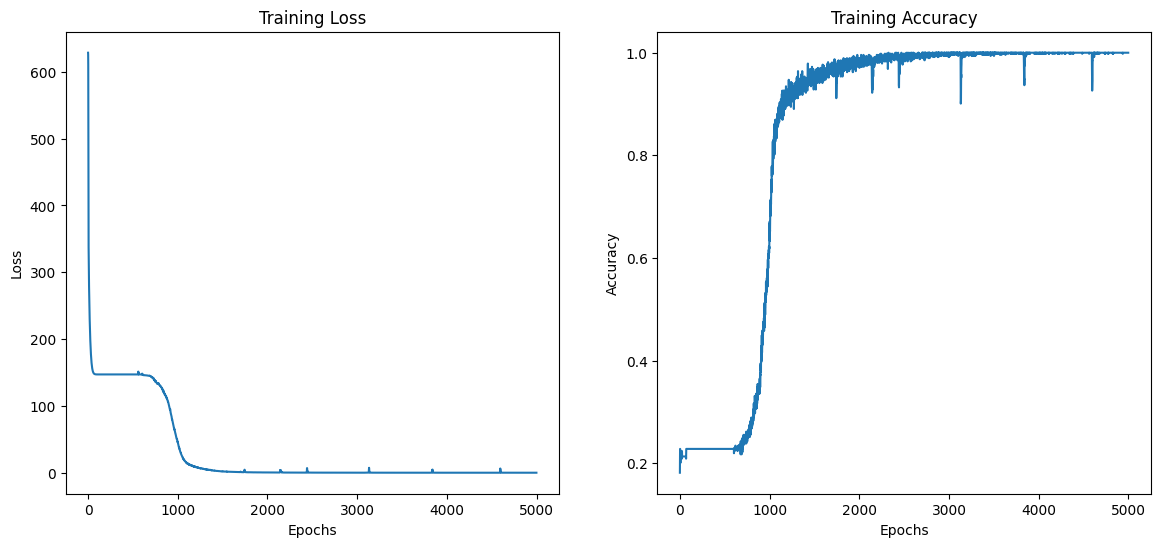

In [48]:
# Plotting the training and validation loss
# plt.figure(figsize=(10, 8))
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].plot(history.history['loss'], label='Loss')
# axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Training Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')

# plot 2
axs[1].plot(history.history['accuracy'], label='accuracy')
axs[1].set_title('Training Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')

plt.show()

In [49]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 21ms/step


In [50]:
for idx in range(0, y_test.shape[0]):
  predicted = np.round(predictions[idx]).astype(int)
  print(f'row {idx}:----------------------------------------------------------------------','\ny_pred', predicted, '\ny_test', y_test[idx], '\n',np.isin(np.round(predictions[idx,:5]).astype(int), y_test[idx,:5]), np.isin(np.round(predictions[idx,-2:]).astype(int), y_test[idx,-2:]))

row 0:---------------------------------------------------------------------- 
y_pred [32 27 33 27 41 10  5] 
y_test [29 48 33 49 35  8  3] [False False  True False False] [False False]
row 1:---------------------------------------------------------------------- 
y_pred [32 33 38  5 30 10  4] 
y_test [20 40  5 50  7 10  2] [False False False  True False] [ True False]
row 2:---------------------------------------------------------------------- 
y_pred [45 17 31 27 24  2  7] 
y_test [31 47 21 39  8  9  5] [False False  True False False] [False False]
row 3:---------------------------------------------------------------------- 
y_pred [18  8 36 32  9 10  6] 
y_test [ 8 10 11 39 30 10  4] [False  True False False False] [ True False]
row 4:---------------------------------------------------------------------- 
y_pred [ 3 11 10 41 16  7  7] 
y_test [30 42 10 21 38 12  2] [False False  True False False] [False False]
row 5:---------------------------------------------------------------------